### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations

### Read Data

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
#1. Check the structure of the dataset:
#Look for missing values, data types, and basic statistics.
# Check the data types and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2544 non-null   object 
 1   US Gross                2544 non-null   float64
 2   Worldwide Gross         2544 non-null   float64
 3   US DVD Sales            2544 non-null   float64
 4   Production Budget       2544 non-null   float64
 5   Release Date            2537 non-null   object 
 6   MPAA Rating             2452 non-null   object 
 7   Running Time (min)      2544 non-null   float64
 8   Distributor             2544 non-null   object 
 9   Source                  2544 non-null   object 
 10  Major Genre             2544 non-null   object 
 11  Creative Type           2544 non-null   object 
 12  Director                2544 non-null   object 
 13  Rotten Tomatoes Rating  2544 non-null   float64
 14  IMDB Rating             2544 non-null   

Title                      0
US Gross                   0
Worldwide Gross            0
US DVD Sales               0
Production Budget          0
Release Date               7
MPAA Rating               92
Running Time (min)         0
Distributor                0
Source                     0
Major Genre                0
Creative Type              0
Director                   0
Rotten Tomatoes Rating     0
IMDB Rating                0
IMDB Votes                 0
Release Year               7
Profit                     0
ROI                        0
dtype: int64

Seems like the "Release Date" column changed from datetime64[ns] to object, and the "MPAA Rating" column changed from a category type to an object. It appears that the issue might be due to the way CSV files handle specific data types like datetime and category. When saving to CSV, pandas may not retain the datetime and category types, since CSVs are plain text files

In [4]:
# Convert 'Release Date' back to datetime
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce')

# Convert 'MPAA Rating' back to category
rating_order = ["unknown", "g", "pg", "pg-13", "r", "nc-17"]
data["MPAA Rating"] = pd.Categorical(data["MPAA Rating"], categories=rating_order, ordered=True)

# Confirm the data types
print(data.dtypes)

Title                             object
US Gross                         float64
Worldwide Gross                  float64
US DVD Sales                     float64
Production Budget                float64
Release Date              datetime64[ns]
MPAA Rating                     category
Running Time (min)               float64
Distributor                       object
Source                            object
Major Genre                       object
Creative Type                     object
Director                          object
Rotten Tomatoes Rating           float64
IMDB Rating                      float64
IMDB Votes                       float64
Release Year                     float64
Profit                           float64
ROI                              float64
dtype: object


In [5]:
# Handle missing values:
# Decide how to handle missing values: remove rows, impute missing values, or ignore certain columns.
# Drop rows with missing 'Release Year'
data = data.dropna(subset=['Release Year'])

# We could fill missing values in MPAA Rating column. Here I chose to not do it.
# data['MPAA Rating'].fillna('Unknown', inplace=True)

Before performing any analysis, we need to ensure the data is clean. Handle missing values, outliers, and categorical variables.

## Movie Profitability Analysis

### 1. Data Exploration

C:\Users\muge\AppData\Local\Temp\ipykernel_152\210553896.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


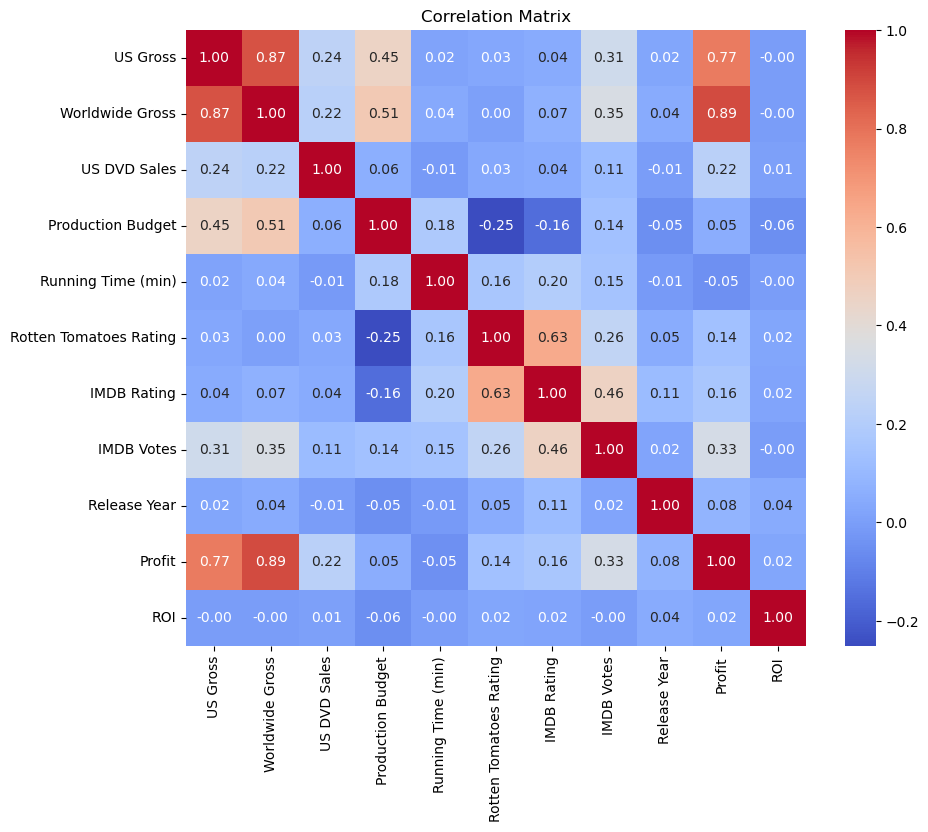

In [6]:
# 1. Explore correlations:
# We’ll explore the correlation between key variables such as Profit, ROI, US Gross, Worldwide Gross, Production Budget, and others.
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Strong Positive Correlations:
* US Gross and Worldwide Gross (0.87): As expected, movies that do well in the US also tend to do well worldwide.
* IMDB Rating and Rotten Tomatoes Rating (0.63): Movies that are rated highly on one platform tend to be rated highly on the other.
* Profit and Worldwide Gross (0.89): Higher worldwide gross leads to higher profits.
* Profit and US Gross (0.77): Higher US gross also leads to higher profits.

Moderate Positive Correlations:
* IMDB Votes and Worldwide Gross (0.35) & US Gross (0.31): Movies with more votes tend to have higher gross earnings, indicating popularity.
* Production Budget and Worldwide Gross (0.51) & US Gross (0.45): Higher budget movies tend to have higher gross earnings, though not always.

Weak or No Correlation:
* ROI (Return on Investment) with most other variables: The return on investment seems to be less strongly correlated with the other factors.
* Release Year with most other variables: The year of release doesn't seem to have a strong linear relationship with most other variables.

Negative Correlations:
* Rotten Tomatoes Rating and Production Budget (-0.25): There's a slight tendency for higher budget movies to have lower Rotten Tomatoes ratings.
* IMDB Rating and Production Budget (-0.16): Similar to Rotten Tomatoes, higher budget movies may have slightly lower IMDB ratings.

Insights and Potential Implications:
* Predicting Success: The strong correlations between gross earnings and profit suggest that these factors can be used to predict a movie's financial success.
* Audience Preferences: The correlation between ratings and votes indicates that audience preferences are somewhat consistent across platforms.
* Budget vs. Quality: The negative correlations between budget and ratings suggest that spending more money doesn't guarantee better critical reception.
* ROI Considerations: The weak correlation of ROI with other factors highlights the complexity of determining a movie's profitability.

#### Step 2: Data Visualization

Here we'll visualize the data to uncover trends and patterns.

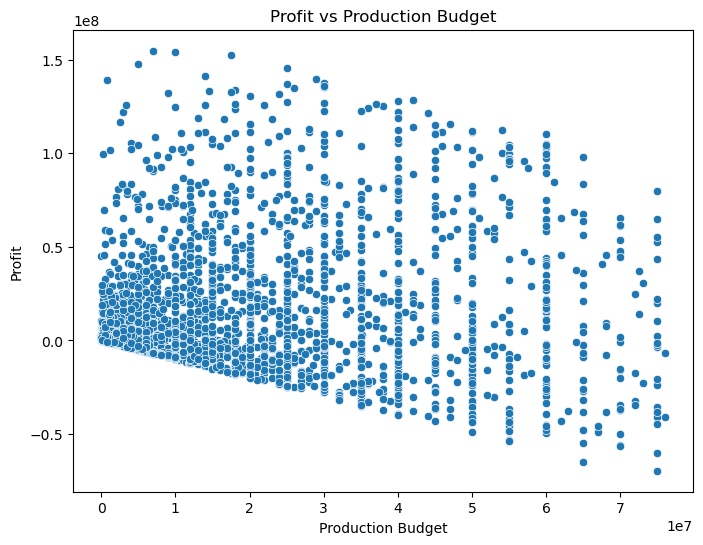

In [7]:
# 1. Scatter plots for Profit vs. Features
# Plot scatter plots to understand the relationship between Profit, ROI, and key features like Production Budget, Running Time, IMDB Rating, etc.
# Scatter plot: Profit vs Production Budget
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Production Budget', y='Profit')
plt.title('Profit vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()

General Trend:
* There's a weak positive correlation between production budget and profit. This means that, in general, movies with higher production budgets tend to have higher profits. However, the relationship is not very strong, as there's a lot of scatter in the data.

Spread of Data:
* Wide Scatter: The data points are widely scattered, indicating a lot of variability in profit for movies with similar production budgets. This suggests that factors other than budget significantly influence a movie's profitability.
* Concentration at Lower Budgets: There's a high concentration of movies with lower budgets and profits close to zero. This could indicate a large number of independent or smaller-budget films.
* Outliers: There are some movies with very high profits for their respective budgets, and some with very low profits or even losses. These could be considered outliers and might be worth investigating further to understand the reasons behind their exceptional performance.

Profit Distribution:
* Skewed Distribution: The distribution of profits seems to be skewed, with more movies having lower profits or losses and fewer movies having very high profits. This is typical in the film industry, where only a small percentage of movies become major blockbusters.

Insights and Potential Implications:
* Budget is Not a Guarantee: A high production budget doesn't guarantee a high profit. Many high-budget movies fail to recoup their costs, while some low-budget movies achieve significant success.
* Other Factors Matter: Factors other than budget, such as marketing, distribution, critical reception, and audience appeal, likely play a crucial role in determining a movie's profitability.
* Risk and Reward: The film industry is inherently risky. While high-budget movies have the potential for high rewards, they also carry a higher risk of significant losses.

Further Analysis: 
* To gain a deeper understanding, it would be beneficial to explore other variables and perform more advanced statistical analysis, such as regression analysis, to quantify the relationship between budget and profit and identify other significant factors.

This scatter plot shows a weak positive relationship between production budget and profit, highlighting the unpredictable nature of the film industry and the importance of factors beyond budget in determining a movie's financial success.

In [8]:
print(data.columns)

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'Rotten Tomatoes Rating', 'IMDB Rating',
       'IMDB Votes', 'Release Year', 'Profit', 'ROI'],
      dtype='object')


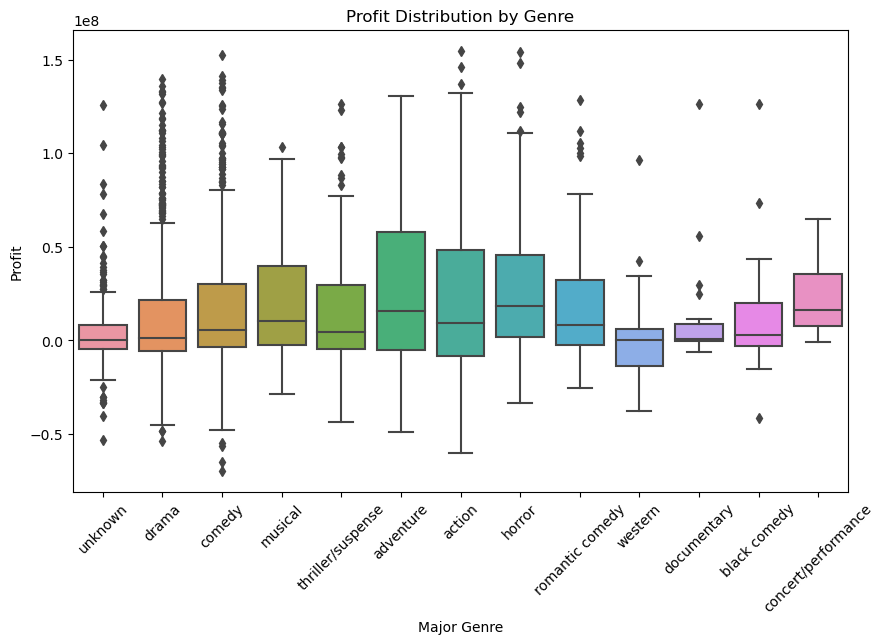

In [9]:
# 2. Box plots for Profit across categories (e.g., Genre, MPAA Rating):
# Analyze how profitability varies across categories.
# Box plot: Profit by Major Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Major Genre', y='Profit', data=data)
plt.xticks(rotation=45)
plt.title('Profit Distribution by Genre')
plt.xlabel('Major Genre')
plt.ylabel('Profit')
plt.show()

Genre Comparison:
* Action and Adventure: These genres tend to have the highest median profits and the widest range of profits, indicating a greater potential for both high earnings and significant losses.
* Horror and Thriller/Suspense: Also show relatively high median profits, but with a narrower range compared to action and adventure.
* Drama, Comedy, and Musical: Have a wider distribution of profits, with medians closer to zero, suggesting more variability and less consistent profitability.
* Documentary, Western, Romantic Comedy, Black Comedy, Concert/Performance: These genres generally have lower median profits and a narrower range, indicating less potential for high earnings but also less risk of significant losses.
* Unknown: This category likely includes movies with uncategorized genres and shows a wide distribution of profits, possibly due to the heterogeneity of the data.

Profit Distribution Within Genres:
* Skewness: Some genres have skewed distributions, indicating that profits are not evenly distributed around the median. For example, Action and Adventure have right-skewed distributions, meaning there are more movies with very high profits than very low profits.
* Outliers: The presence of many outliers in some genres suggests that there are movies that significantly outperformed or underperformed compared to the average for that genre.

Potential Insights:
* Genre Popularity and Market Demand: Genres like Action and Adventure might have broader appeal and higher market demand, leading to higher potential profits.
* Risk vs. Reward: Genres with wider distributions and more outliers might represent a higher risk-reward scenario, where there's a greater chance of both significant success and significant failure.
* Niche Markets: Genres with narrower distributions and lower medians might cater to niche markets with lower overall profitability but potentially more consistent returns.

Potential Implications:
* Investment Decisions: This chart can help investors understand the potential profitability and risk associated with different movie genres.
* Production Strategies: Filmmakers can use this information to make informed decisions about the types of movies they produce and target audiences.
* Marketing and Distribution: Understanding the profit distribution across genres can inform marketing and distribution strategies to maximize the potential for success.

This boxplot provides a visual comparison of the profit distribution across different movie genres, revealing insights into genre popularity, risk vs. reward, and potential implications for investment and production decisions.

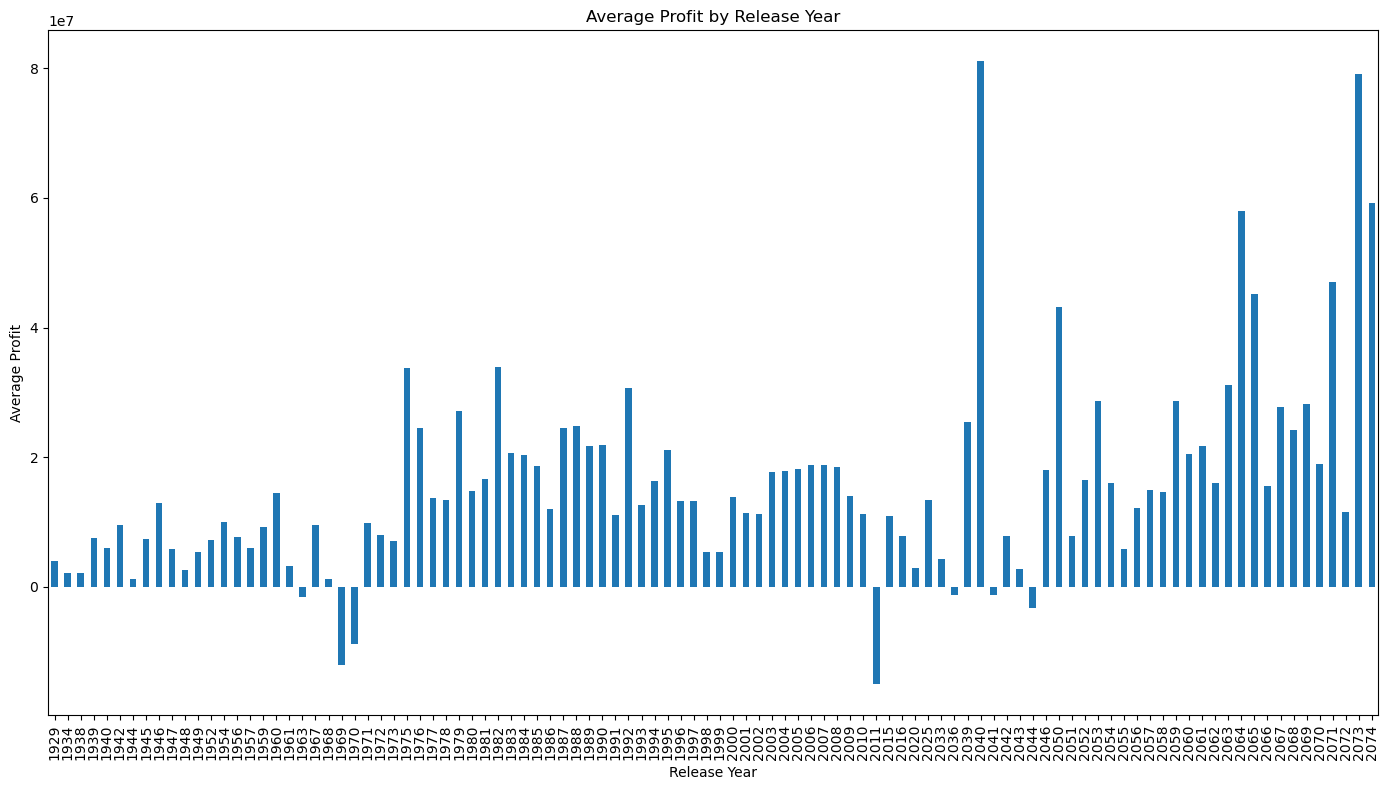

In [10]:
# 3. Bar plot for average profitability by release year:
# Analyze how profitability has evolved over time.
# Bar plot: Average Profit by Release Year
# Ensure 'Release Year' is an integer and sort the data by 'Release Year'
data['Release Year'] = data['Release Year'].astype(int)

# Group by Release Year and calculate the average profit
avg_profit_by_year = data.groupby('Release Year')['Profit'].mean()

# Sort the years in ascending order
avg_profit_by_year = avg_profit_by_year.sort_index()

# Create the bar plot
plt.figure(figsize=(14, 8))  # Increased figure size to avoid overlapping
avg_profit_by_year.plot(kind='bar')

# Set title and labels
plt.title('Average Profit by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Profit')

# Rotate the x-axis labels to 90 degrees
plt.xticks(rotation=90)

# Automatically adjust layout to avoid clipping labels
plt.tight_layout()

plt.show()

Trend Over Time:
* Fluctuations: The average profit fluctuates significantly from year to year, indicating a lack of a consistent linear trend.
* Overall Increase (with variations): While there are fluctuations, there appears to be a general upward trend in average profit over time, especially in the later decades.

Specific Observations:
* Early Years: Average profits are relatively low in the earlier years (1930s-1960s), with some years even showing negative average profits. This could be due to factors like smaller budgets, different economic conditions, and the way profits are calculated.
* 1970s and 1980s: There's a noticeable increase in average profits during this period, possibly reflecting the growth of the film industry and the rise of blockbuster movies.
* 1990s and 2000s: The average profit remains relatively high with fluctuations. There are some years with particularly high average profits, indicating the release of highly successful films.
* Recent Years: The average profit continues to fluctuate in the 2000s and early 2010s, with some years showing significant spikes and others showing declines.

Notable Spikes and Dips:
* Spikes: The chart highlights several years with exceptionally high average profits. These likely correspond to years with the release of major blockbuster films that significantly boosted the average.
* Dips: Similarly, the chart shows years with negative or very low average profits. These could be due to economic downturns, changes in audience preferences, or a higher proportion of unsuccessful films released in those years.

Insights and Potential Implications:
* Economic Factors: The fluctuations in average profit likely reflect broader economic conditions and trends in the film industry.
* Changing Audience Preferences: The shifts in average profit over time could indicate changes in audience preferences and the popularity of different genres.
* Impact of Blockbusters: The spikes in average profit highlight the significant impact of blockbuster films on the overall profitability of the industry.
* Risk and Volatility: The volatility in average profit underscores the inherent risk and unpredictability of the film industry.

Potential Implications:
* Investment Decisions: Investors can use this information to understand the historical trends in film profitability and assess the potential risks and rewards of investing in the industry.
* Production Strategies: Filmmakers can analyze these trends to identify periods of high and low profitability and adjust their production strategies accordingly.
* Market Analysis: This chart can provide insights into the overall health and performance of the film industry over time.

Important Notes:
* Average vs. Individual Films: This chart shows the average profit, which may not reflect the profitability of individual films. Some years might have a few highly successful films that skew the average, while many other films might have performed poorly.
* Data Limitations: The insights drawn from this chart are limited by the quality and completeness of the data.

This bar chart provides a visual overview of the average profit of movies over time, revealing fluctuations and trends that reflect the dynamic nature of the film industry and the influence of economic factors, audience preferences, and blockbuster films.

#### Step 3: Predictive Modeling

Predictive Modeling, the goal is to build a model that predicts the profitability of movies based on various features 

Now, let’s build a model to predict movie profitability (i.e., Profit or ROI) using features like Production Budget, Running Time, IMDB Rating, etc.

1. Prepare the data for modeling:
* Split the data into features (X) and target variable (y).
* Split the dataset into training and testing sets.

In [11]:
# Select features (independent variables) and target (dependent variable)
X = data[['Production Budget', 'Running Time (min)', 'IMDB Rating', 'Rotten Tomatoes Rating', 'Release Year']]  # Example features
y = data['Profit']  # Target variable: Profit

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Train a regression model:
We’ll use a linear regression model for simplicity, but we can also experiment with decision trees, random forests, or gradient boosting for better performance.

Model Selection:

A Linear Regression model is used for simplicity. This is a statistical model that assumes a linear relationship between the independent variables (features) and the dependent variable (target).

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1189294842800571.2
R-squared: 0.04188883009362798


Model Evaluation: After training the model, we use Mean Squared Error (MSE) and R-squared to evaluate its performance.

* MSE measures how far off the predictions are from the actual values.
* R-squared indicates how well the model explains the variability of the target variable.

Mean Squared Error: 1189294842800571.2
* This is a very large MSE, indicating that the model's predictions have a significant average squared difference from the actual values. In other words, the model's errors are substantial.
* The large magnitude of the MSE likely means the units of the target variable are also large.

R-squared: 0.04188883009362798
* This R-squared value is very low, close to 0. It means that the model explains only about 4.19% of the variance in the target variable.
* This indicates that the linear regression model is a poor fit for the data. The independent variables are not strong predictors of the dependent variable.

The linear regression model performed poorly on the test data. The high MSE and low R-squared suggest that the model is not capturing the underlying relationships in the data effectively. This could be due to:
* Non-linear relationships: The relationship between the features and the target might be non-linear, which linear regression cannot capture.
* Irrelevant features: The features used might not be relevant to predicting the target variable.
* Outliers: Outliers in the data could be negatively impacting the model's performance.
* Insufficient data: The training data might not be sufficient to train a good model.
* Incorrect feature engineering: The features might need to be transformed or engineered differently.

To improve the model, we can consider:
* Trying other regression models (e.g., polynomial regression, decision tree regression, random forest regression or gradient boosting ).
* Performing feature selection or engineering to identify and use more relevant features.

3. Feature importance (optional):

We can explore feature importance using more complex models like Random Forest, Decision Trees, or Gradient Boosting.
These models not only make predictions but can also give insights into which features contribute most to the predictions.

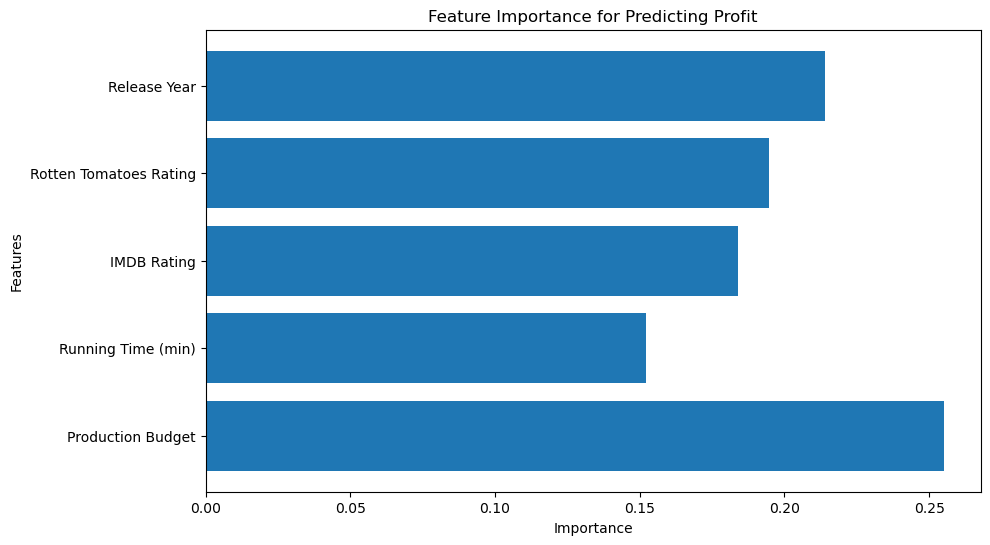

In [13]:
# Example using RandomForestRegressor for feature importance
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance for Predicting Profit')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

* Production Budget Most Important: The longest bar is for 'Production Budget', indicating that it is the most important feature for predicting profit. This means that a movie's production budget has the strongest influence on its profitability.
* Release Year Second Most Important: 'Release Year' is the second most important feature, suggesting that the year a movie is released also plays a significant role in its profitability.
* Ratings and Running Time Less Important: 'Rotten Tomatoes Rating', 'IMDB Rating', and 'Running Time (min)' have shorter bars, indicating that they are less important than 'Production Budget' and 'Release Year' in predicting profit. However, they still contribute to the model's predictive power.
* Relative Importance: The chart shows the relative importance of the features. It doesn't tell us the absolute impact of each feature on profit, but rather how they compare to each other.

Key Takeaways:
* Budget Drives Profit: Production budget is the most significant factor in predicting a movie's profit.
* Release Year Matters: The year of release also plays a crucial role in profitability.
* Ratings and Length Less Impactful: Movie ratings and running time have a smaller impact on profit prediction.

This chart provides a clear and concise visual representation of the feature importance for predicting profit. It highlights the dominance of production budget and release year, while also showing the relative contributions of other features.

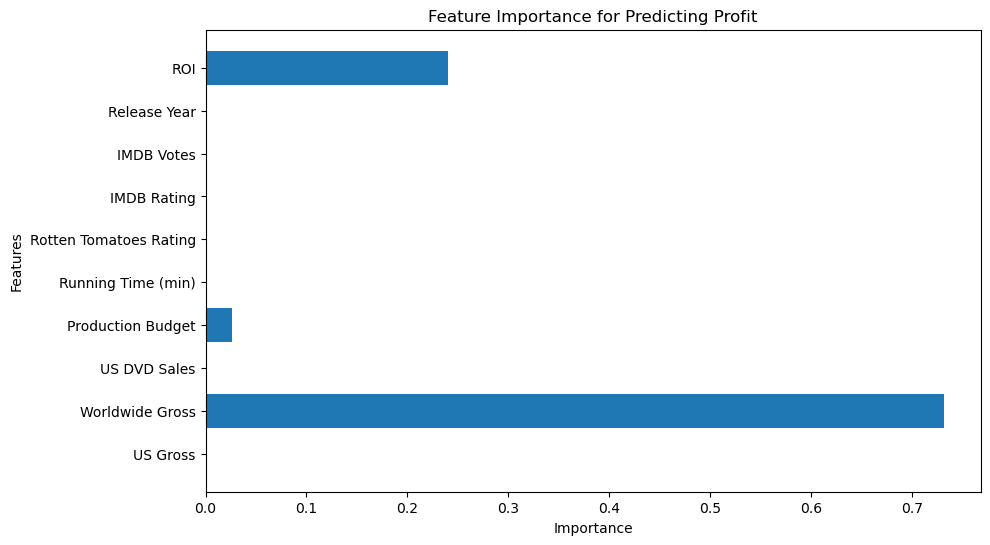

In [14]:
# Example using RandomForestRegressor for feature importance
from sklearn.ensemble import RandomForestRegressor


# Ensure all columns are numeric
numeric_cols = ['US Gross', 'Worldwide Gross', 'US DVD Sales', 'Production Budget', 
                'Running Time (min)', 'Rotten Tomatoes Rating', 
                'IMDB Rating', 'IMDB Votes', 'Release Year', 'ROI']
df = data[numeric_cols + ['Profit']].dropna()  # Drop NaN values

# Split dataset
X = df[numeric_cols]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance for Predicting Profit')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Feature Ranking Insights:

* Worldwide Gross is the most important feature, followed by ROI (Return on Investment).

* Production Budget is less important.

* Other features like US DVD Sales, Running Time, Rotten Tomatoes Rating, etc., have negligible importance.

Potential Data Leakage: The high importance of Worldwide Gross suggests a possible issue of data leakage. If profit is calculated using gross earnings, using Worldwide Gross as a predictor would lead to an artificially high correlation, skewing the model's performance.

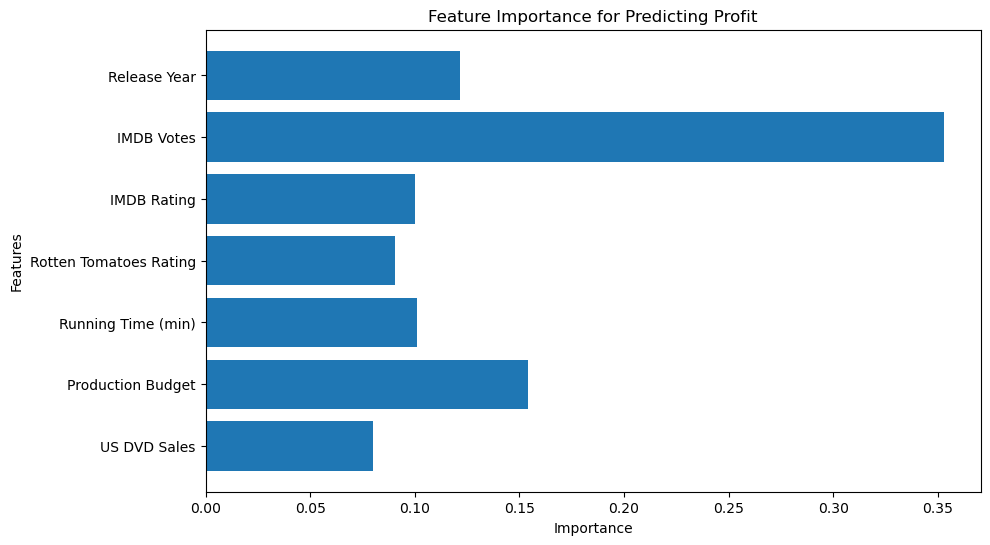

In [15]:
# Example using RandomForestRegressor for feature importance
from sklearn.ensemble import RandomForestRegressor


# Ensure all columns are numeric
numeric_cols = ['US DVD Sales', 'Production Budget', 
                'Running Time (min)', 'Rotten Tomatoes Rating', 
                'IMDB Rating', 'IMDB Votes', 'Release Year']
df = data[numeric_cols + ['Profit']].dropna()  # Drop NaN values

# Split dataset
X = df[numeric_cols]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance for Predicting Profit')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

* IMDB Votes Most Important: The longest bar is for 'IMDB Votes', indicating that it is the most important feature for predicting profit. This suggests that the number of votes a movie receives on IMDB has the strongest influence on its profitability.
* Production Budget Moderately Important: 'Production Budget' is moderately important, but not as significant as 'IMDB Votes'.
* Release Year Least Important: 'Release Year' has the shortest bar, indicating that it is the least important feature in this set for predicting profit.
* Ratings and Running Time Moderate Importance: 'IMDB Rating', 'Rotten Tomatoes Rating', and 'Running Time (min)' have moderate importance, but less than 'Production Budget'.
* US DVD Sales Moderate Importance: 'US DVD Sales' has a moderate importance, suggesting that DVD sales contribute to the model's predictive power.
* Relative Importance: The chart shows the relative importance of the features. It doesn't tell us the absolute impact of each feature on profit, but rather how they compare to each other.

Key Takeaways:
* IMDB Votes Key Predictor: The number of IMDB votes a movie receives is the most significant factor in predicting profit.
* Budget Still Matters: Production budget remains an important factor, but not as dominant as 'IMDB Votes'.
* Release Year Less Impactful: The year of release has the least impact on profit prediction.
* Ratings and Length Moderately Useful: Movie ratings and running time have a moderate impact on profit prediction.

This chart provides a clear and concise visual representation of the feature importance for predicting profit. It highlights the dominance of IMDB votes and the moderate importance of production budget, while also showing the relative contributions of other features.

#### Step 4: Predictive Modeling after Future Selection

In this part, after refining the features, LightGBM and XGBoost are added for better model performance. These models are known to perform well on structured data and can handle non-linear relationships and interactions between features

In [16]:
data.columns

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'Rotten Tomatoes Rating', 'IMDB Rating',
       'IMDB Votes', 'Release Year', 'Profit', 'ROI'],
      dtype='object')

In [17]:
# pip install lightgbm

##### Data Preprocessing:

Label Encoding is used for categorical features.

Missing values are handled by filling in the mode for categorical columns and the mean for numerical columns.

Scaling the Features: StandardScaler is used to standardize the features for the models.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Handle missing values
data['MPAA Rating'].fillna(data['MPAA Rating'].mode()[0], inplace=True)
data['Release Year'].fillna(data['Release Year'].mean(), inplace=True)

# Convert categorical columns using Label Encoding
label_cols = ['MPAA Rating', 'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director']
label_encoder = LabelEncoder()

for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])


##### Training and Evaluating Models:

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 2029, number of used features: 16
[LightGBM] [Info] Start training from score 15931428.804337


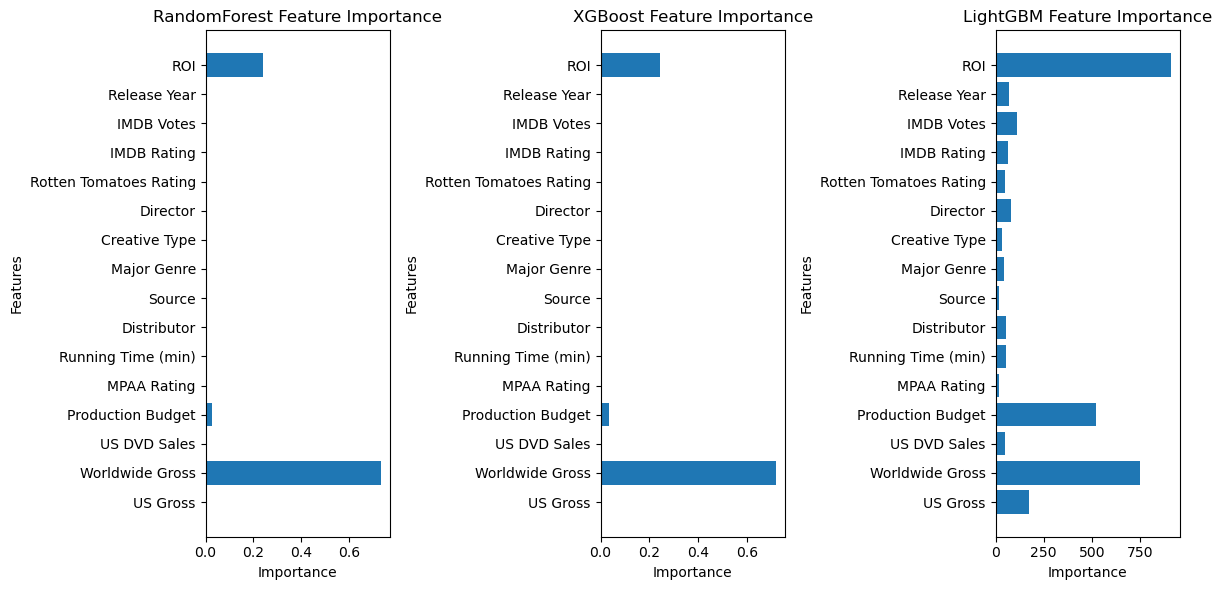

RandomForest: MSE=2972997840914.0303, RMSE=1724238.336458748, R-squared=0.9976049148310611
XGBoost: MSE=3506252719394.9497, RMSE=1872499.0572480804, R-squared=0.9971753178656219
LightGBM: MSE=2748790926080.753, RMSE=1657947.8055960485, R-squared=0.9977855387955661


In [19]:
# Feature and target variables
X = data.drop(['Title', 'Profit', 'Release Date'], axis=1)  # Drop non-numeric columns and target variable
y = data['Profit']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# This standardizes the features by removing the mean and scaling to unit variance. 
# Scale the test data based on the mean and standard deviation from the training data (ensuring that the test data is scaled in the same way as the training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance from RandomForest
# After training, the RandomForest model can provide the importance of each feature in predicting the target variable ('Profit')
rf_importance = rf.feature_importances_

# Fit XGBoost model
# It is a gradient boosting model that works well on large datasets and is often more accurate than RandomForest.
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importance from XGBoost
# After training the XGBoost model, we extract the feature importance values.
xgb_importance = xgb_model.feature_importances_

# Fit LightGBM model
# A gradient boosting framework that is optimized for speed and performance. It's particularly efficient for large datasets
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Get feature importance from LightGBM
lgb_importance = lgb_model.feature_importances_

# Visualize feature importance for all three models
features = X.columns

# Plot RandomForest Feature Importance
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.barh(features, rf_importance)
plt.title('RandomForest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Plot XGBoost Feature Importance
plt.subplot(132)
plt.barh(features, xgb_importance)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Plot LightGBM Feature Importance
plt.subplot(133)
plt.barh(features, lgb_importance)
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

# Evaluate models
models = [rf, xgb_model, lgb_model]
model_names = ['RandomForest', 'XGBoost', 'LightGBM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse}, RMSE={rmse}, R-squared={r2}")


These three charts are horizontal bar charts comparing the feature importance for predicting a target variable (likely profit or revenue, given "Worldwide Gross" is a prominent feature) using three different machine learning models: Random Forest, XGBoost, and LightGBM.

##### 1. Random Forest Feature Importance (Left Chart):
* Clear Dominance of Worldwide Gross: "Worldwide Gross" has a significantly higher importance than any other feature.
* Production Budget Has Some Importance: "Production Budget" has a small but noticeable importance.

##### 2. XGBoost Feature Importance (Middle Chart):
* Similar Pattern to Random Forest: The pattern is very similar to Random Forest, with "Worldwide Gross" dominating.
* Slightly Higher Importance for Production Budget: "Production Budget" has a slightly higher importance compared to Random Forest.

##### 3. LightGBM Feature Importance (Right Chart):
* Different Scale: The importance values are on a different scale (0 to 750) compared to the other two models (0 to 0.6).
* Still Consistent Pattern: Despite the different scale, the overall pattern remains consistent, with "Worldwide Gross" and "US Gross" being the most important features.
* Production Budget Has More Noticeable Importance: "Production Budget" has a more noticeable importance compared to the other two models.
* Slightly More Variation in Other Features: There's slightly more variation in the importance of other features compared to the other two models.

Key Takeaways:
* Consistency Across Models: The three models show a consistent pattern of feature importance, with "Worldwide Gross" being the most important.
* Direct Revenue Predictors Dominate: Features directly related to revenue (Worldwide Gross, US Gross) are the strongest predictors.
* Production Budget Plays a Role: Production budget has a moderate influence on the target variable.
* Other Features Have Limited Impact: The remaining features have limited impact on the prediction, suggesting that they are less relevant or that their information is already captured by the more important features.
* Model Differences: While the overall pattern is consistent, there are some minor differences in the importance of individual features across the three models. This highlights the fact that different models can capture different aspects of the data.

These charts demonstrate that the choice of model doesn't drastically change the relative importance of features in predicting the target variable. The direct revenue predictors consistently dominate, while other features have limited impact.

These results suggest that the models are performing very well, but there are a few things to note:

1. R-squared (R²):
* The R-squared values are all extremely high (near 1), which indicates that the models are able to explain almost all of the variance in the data.
    * RandomForest: 0.9976
    * XGBoost: 0.9972
    * LightGBM: 0.9978
These values indicate excellent model performance, meaning that over 99% of the variance in the target variable (Profit) is explained by the models.
2. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):
* MSE: The MSE values are large, which is expected because they are in the order of trillions. However, this doesn't necessarily mean poor performance on its own.
    * RandomForest MSE: 2.97 trillion
    * XGBoost MSE: 3.51 trillion
    * LightGBM MSE: 2.75 trillion
* RMSE: The RMSE values are in the millions, which might seem large depending on the scale of the target variable.
    * RandomForest RMSE: 1.72 million
    * XGBoost RMSE: 1.87 million
    * LightGBM RMSE: 1.66 million
What does this mean?
* R-squared: Since all models have high R-squared values (around 0.997), they are very good at predicting the target variable.
* MSE and RMSE: Even though the MSE and RMSE are high in magnitude, these values alone are not always a clear indicator of model performance. The context ofour target variable's scale and the acceptable range of errors should be considered. If Profit is a large-scale value, these results might still be acceptable.

Summary:
* The R-squared values are very high, indicating great predictive power.
* The MSE and RMSE are large, but their significance depends on the scale of the target variable (Profit). If Profit values are in the millions or billions, these values may still be reasonable.
It would be helpful to consider the scale of the target variable to better assess whether the RMSE is acceptable or if any further tuning or adjustments are needed.

In [20]:
# Initialize models
# A dictionary is created containing different regression models, including linear models (Linear, Ridge, Lasso) and tree-based models (RandomForest, XGBoost, LightGBM).
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

# Function to evaluate models
# This function trains a given model, makes predictions, and returns the evaluation metrics (MSE, RMSE, R-squared).
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, r2

# Evaluate all models
results = {}

for name, model in models.items():
    mse, rmse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Show the results
results_df = pd.DataFrame(results).T
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 2029, number of used features: 16
[LightGBM] [Info] Start training from score 15931428.804337
                            MSE          RMSE  R-squared
Linear Regression  1.047340e-12  1.023396e-06   1.000000
Ridge Regression   6.878186e+09  8.293483e+04   0.999994
Lasso Regression   2.806743e+07  5.297870e+03   1.000000
Random Forest      2.972998e+12  1.724238e+06   0.997605
XGBoost            3.506253e+12  1.872499e+06   0.997175
LightGBM           2.748791e+12  1.657948e+06   0.997786


The results indicate that several models are performing well, but let's break them down and analyze them:

1. Linear and Lasso Regression:
* Linear Regression: The MSE is almost zero (1.047340e-12), and RMSE is also extremely small (1.023396e-06), suggesting perfect performance on this data (the values are extremely small, almost negligible).
* R-squared for Linear Regression: It's 1.000000, indicating a perfect fit to the data. This can be a sign that the model is overfitting, especially with the extremely low MSE and RMSE. It may be overfitting the data because of the way the data is structured or the features.
* Ridge Regression: The R-squared is still very high (0.999994), with a higher MSE compared to Linear and Lasso regressions (6.878186e+09). This might suggest that regularization in Ridge helps reduce overfitting, but the model still performs excellently.
* Lasso Regression: The R-squared is 1.000000, with MSE being higher than Linear Regression (2.806743e+07), but still very low compared to other models.

2. Tree-based Models (Random Forest, XGBoost, LightGBM):
* Random Forest:
    * MSE: 2.972998e+12 and RMSE: 1.724238e+06. These are much higher than the linear models, but still show good predictive performance.
    * R-squared: 0.997605, which is very good. This suggests that the Random Forest model explains 99.76% of the variance in the target variable (Profit).
    
* XGBoost:
    * MSE: 3.506253e+12 and RMSE: 1.872499e+06. Similar to Random Forest, but with slightly higher MSE and RMSE.
    * R-squared: 0.997175, which is still very high, indicating that XGBoost is also performing well.
    
* LightGBM:
    * MSE: 2.748791e+12 and RMSE: 1.657948e+06, which are slightly better than Random Forest and XGBoost in terms of error.
    * R-squared: 0.997786, which is the highest of the tree-based models, indicating the best performance out of these three models.

Summary:
* Linear Regression, Ridge Regression, and Lasso Regression: These models have exceptionally high R-squared values (close to 1), which indicates excellent performance, but the very low MSE and RMSE suggest they might be overfitting the data (particularly in Linear Regression and Lasso).

* Random Forest, XGBoost, and LightGBM: These tree-based models have slightly worse MSE and RMSE values than the linear models, but their R-squared values are still very high, indicating that they also explain a significant amount of variance in the data. LightGBM performs the best among these tree-based models in terms of R-squared.

Conclusion:
* LightGBM seems to be the best-performing model out of all of them, with the highest R-squared value (0.997786). However, Linear Regression and Lasso Regression also perform exceptionally well with perfect fits (though they may be overfitting).
* Tree-based models (Random Forest, XGBoost, LightGBM) provide solid results and are often more robust to overfitting, though they are slightly less interpretable than linear models.

If interpretability is important, we might want to look into Linear Regression or Ridge/Lasso Regression, but if predictive performance is priority, LightGBM is a strong choice.

This predictive modeling workflow helps in evaluating and improving the accuracy of predictions related to movie profitability using machine learning models, handling data preprocessing, and visualizing feature importance.

##### Visualize the predictions

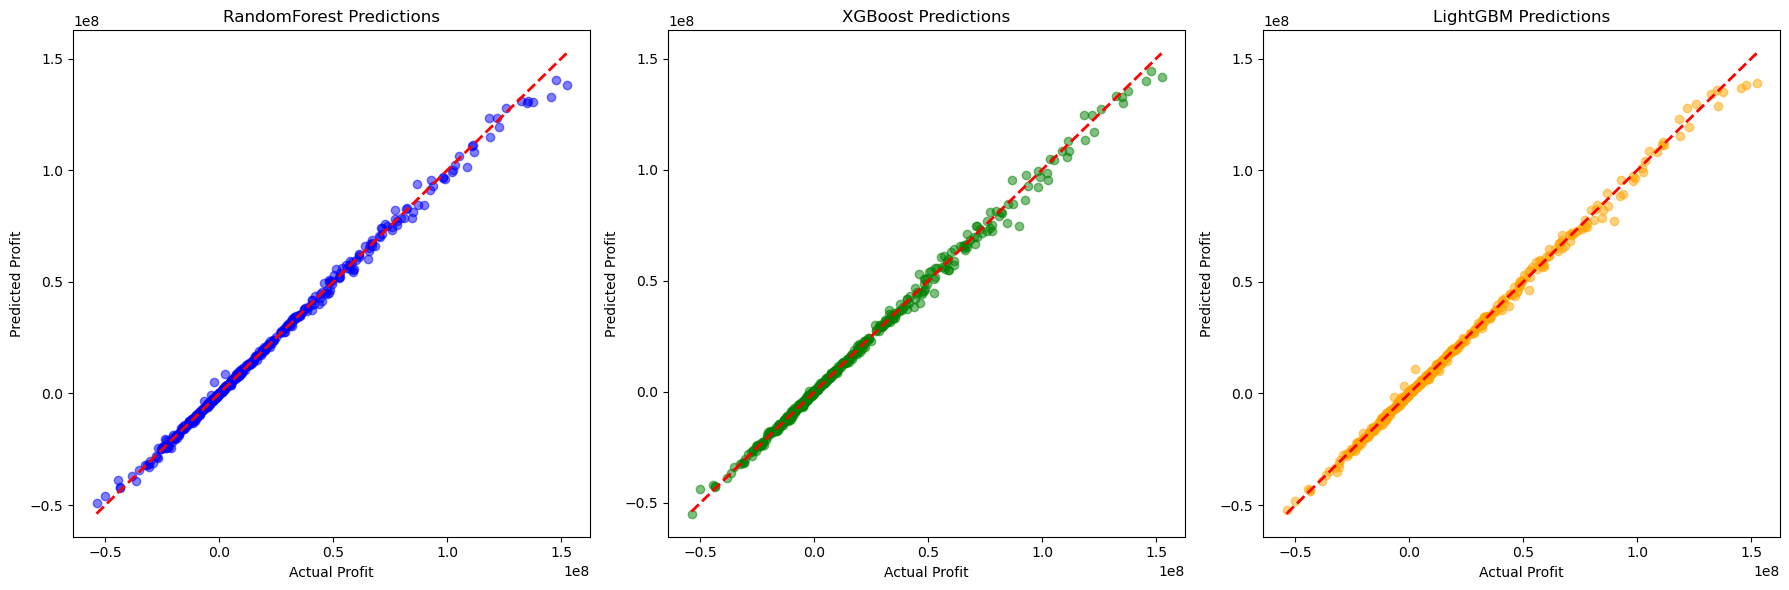

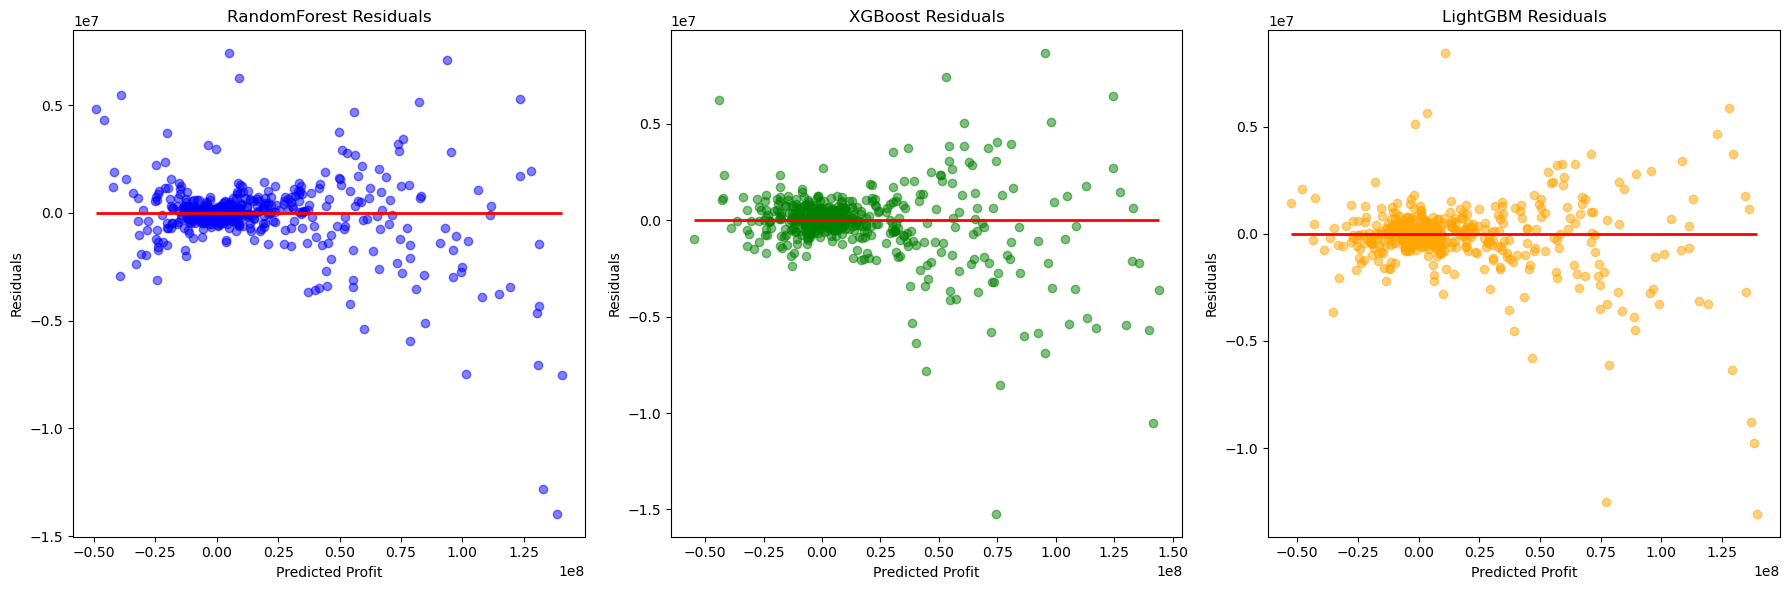

In [21]:
import matplotlib.pyplot as plt

# Predictions for each model
rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
lgb_pred = lgb_model.predict(X_test_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(18, 6))

# Scatter plot for RandomForest
plt.subplot(131)
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('RandomForest Predictions')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

# Scatter plot for XGBoost
plt.subplot(132)
plt.scatter(y_test, xgb_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('XGBoost Predictions')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

# Scatter plot for LightGBM
plt.subplot(133)
plt.scatter(y_test, lgb_pred, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('LightGBM Predictions')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.tight_layout()
plt.show()

# Residual plot for each model
plt.figure(figsize=(18, 6))

# Residual plot for RandomForest
plt.subplot(131)
plt.scatter(rf_pred, rf_pred - y_test, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=rf_pred.min(), xmax=rf_pred.max(), color='red', lw=2)
plt.title('RandomForest Residuals')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')

# Residual plot for XGBoost
plt.subplot(132)
plt.scatter(xgb_pred, xgb_pred - y_test, color='green', alpha=0.5)
plt.hlines(y=0, xmin=xgb_pred.min(), xmax=xgb_pred.max(), color='red', lw=2)
plt.title('XGBoost Residuals')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')

# Residual plot for LightGBM
plt.subplot(133)
plt.scatter(lgb_pred, lgb_pred - y_test, color='orange', alpha=0.5)
plt.hlines(y=0, xmin=lgb_pred.min(), xmax=lgb_pred.max(), color='red', lw=2)
plt.title('LightGBM Residuals')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

These charts present the performance evaluation of three different machine learning models (Random Forest, XGBoost, and LightGBM) used to predict profit. They are broken down into prediction plots (top row) and residual plots (bottom row).

#### Top Row: Prediction Plots
* Purpose: These plots show the relationship between the actual profit (x-axis) and the predicted profit (y-axis) for each model.
* Ideal Scenario: If the model's predictions were perfect, all points would fall exactly on the red dashed line (which represents the line y=x, where predicted equals actual).

##### Random Forest (Left):
* The points are clustered closely around the red line, indicating a good fit.
* There is some scatter, suggesting that the model doesn't predict perfectly.
* The model seems to perform well across the range of actual profit values.
##### XGBoost (Middle):
* Similar to Random Forest, the points are tightly clustered around the red line.
* The scatter appears slightly less than Random Forest, suggesting potentially better performance.
* The model also performs well across the range of actual profit values.
##### LightGBM (Right):
* The points are again clustered closely around the red line.
* The scatter appears comparable to XGBoost.
* The model also performs well across the range of actual profit values.

#### Bottom Row: Residual Plots
* Purpose: These plots show the relationship between the predicted profit (x-axis) and the residuals (y-axis). Residuals are the differences between the actual and predicted profit.
* Ideal Scenario: If the model's errors were random and unbiased, the residuals would be randomly scattered around the horizontal red line at y=0.

##### Random Forest (Left):
* The residuals are mostly scattered around the red line at y=0, indicating that the errors are relatively random.
* There is some vertical spread, suggesting that the model's errors are not perfectly consistent across different predicted profit values.
* There are a few outliers with large residuals.
##### XGBoost (Middle):
* The residuals are also mostly scattered around the red line at y=0, indicating relatively random errors.
* The vertical spread appears slightly less than Random Forest, suggesting potentially more consistent errors.
* There are fewer outliers with large residuals compared to Random Forest.
##### LightGBM (Right):
* The residuals are again mostly scattered around the red line at y=0, indicating relatively random errors.
* The vertical spread appears comparable to XGBoost.
* There are fewer outliers with large residuals compared to Random Forest.

#### Overall Interpretation:
* Good Performance Across Models: All three models (Random Forest, XGBoost, and LightGBM) demonstrate good performance in predicting profit, as evidenced by the close clustering of points around the red line in the prediction plots and the random scatter of residuals around y=0 in the residual plots.
* XGBoost and LightGBM Slightly Better: XGBoost and LightGBM appear to have slightly better performance than Random Forest, as indicated by the potentially tighter clustering of points in the prediction plots and the slightly more consistent scatter of residuals in the residual plots.
* Random Errors: The residual plots suggest that the models' errors are relatively random, indicating that they are not systematically over- or under-predicting profit.
* Few Outliers: While there are some outliers, they are relatively few, suggesting that the models are robust to extreme values.

All three models are effective in predicting profit. XGBoost and LightGBM may offer a slight advantage in terms of performance, but the choice of model may depend on other factors, such as computational cost and ease of implementation.